**NORMAL**

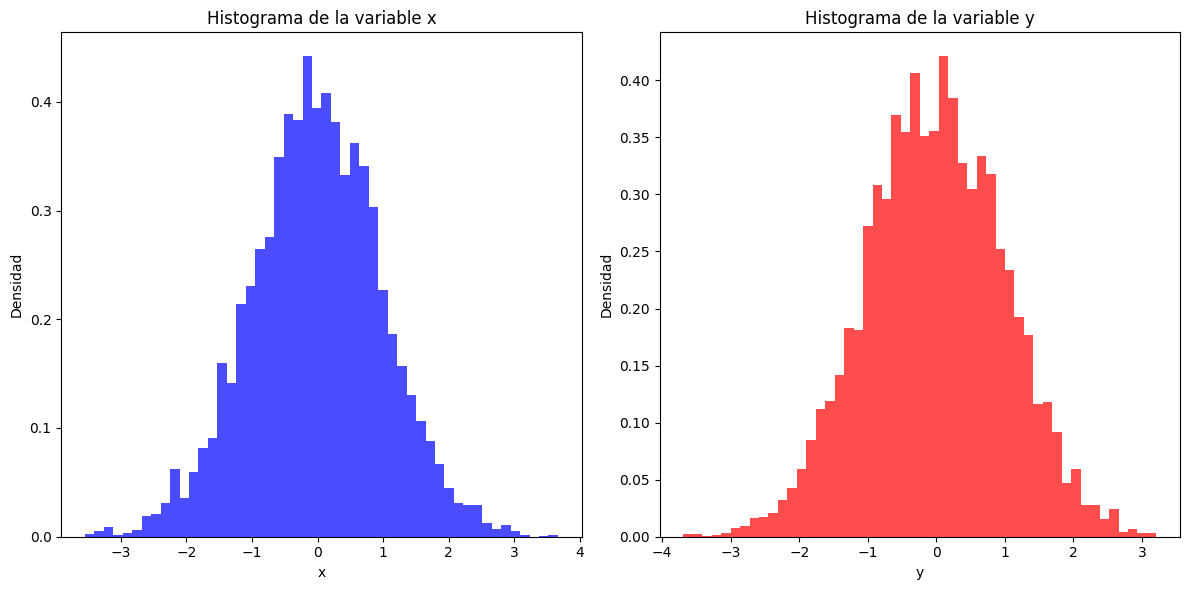

Media de la muestra: [-0.01361273 -0.01715495]
Varianza de la muestra: [0.9851339  1.00899762]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Definimos la distribución objetivo: una distribución normal bivariante
def target_distribution(x, y, mu, cov):
    pos = np.array([x, y])
    return multivariate_normal.pdf(pos, mean=mu, cov=cov)

# Algoritmo Metropolis-Hastings para dos variables (x, y)
def metropolis_hastings_2d(target_dist, mu, cov, proposal_std, num_samples, initial_value):
    samples = []
    current_sample = np.array(initial_value)

    for _ in range(num_samples):
        # Proponer un nuevo valor para (x, y) de una distribución normal con la media en el valor actual
        proposal = np.random.normal(current_sample, proposal_std, size=2)

        # Calcular la probabilidad de aceptación
        acceptance_ratio = min(1, target_dist(proposal[0], proposal[1], mu, cov) /
                                  target_dist(current_sample[0], current_sample[1], mu, cov))

        # Aceptar o rechazar la nueva muestra
        if np.random.rand() < acceptance_ratio:
            current_sample = proposal

        # Almacenar la muestra
        samples.append(current_sample)

    return np.array(samples)

# Parámetros del algoritmo
num_samples = 10000
proposal_std = 1.0
initial_value = [0, 0]

# Parámetros de la distribución normal bivariante
mu = [0, 0]  # Media (centro de la distribución)
cov = [[1, 0.5], [0.5, 1]]  # Matriz de covarianza

# Generar las muestras
samples = metropolis_hastings_2d(target_distribution, mu, cov, proposal_std, num_samples, initial_value)

# Calcular media y varianza de las muestras
mean_sample = np.mean(samples, axis=0)
var_sample = np.var(samples, axis=0)

# Graficar histogramas de las muestras
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(samples[:, 0], bins=50, density=True, alpha=0.7, color='b')
plt.title('Histograma de la variable x')
plt.xlabel('x')
plt.ylabel('Densidad')

plt.subplot(1, 2, 2)
plt.hist(samples[:, 1], bins=50, density=True, alpha=0.7, color='r')
plt.title('Histograma de la variable y')
plt.xlabel('y')
plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

# Mostrar resultados de media y varianza
print("Media de la muestra:", mean_sample)
print("Varianza de la muestra:", var_sample)


**CHI CUADRADA**

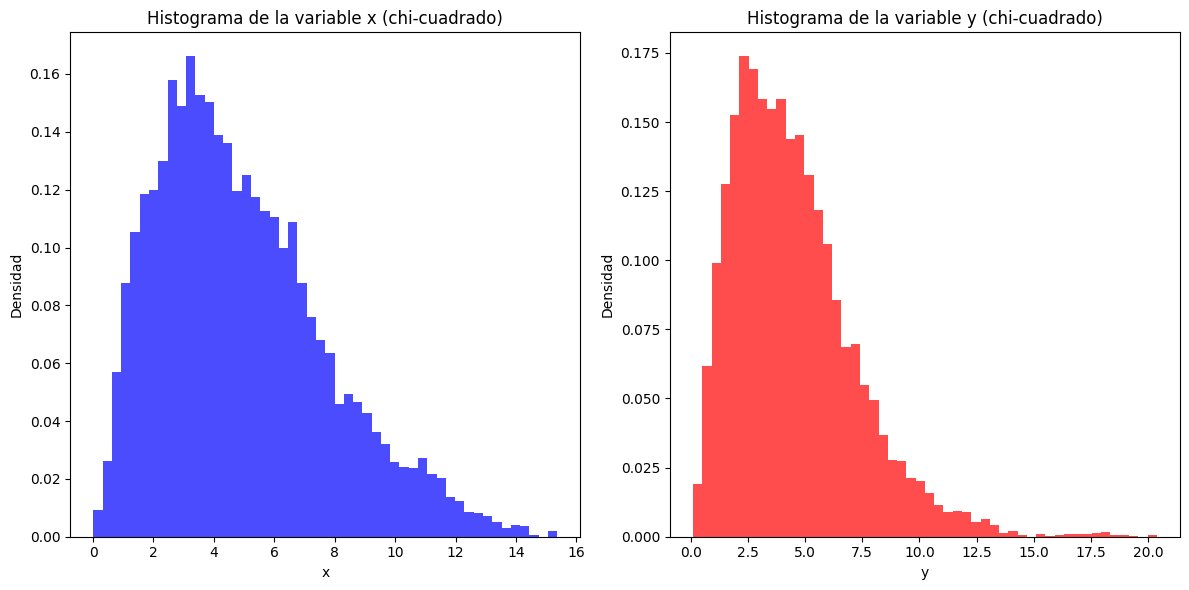

Media de la muestra: [4.91808477 4.48559267]
Varianza de la muestra: [7.81558813 7.12267842]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Definimos la distribución objetivo: una distribución chi-cuadrado con k grados de libertad
def target_distribution(x, y, k):
    if x > 0 and y > 0:  # La distribución chi-cuadrado no está definida para valores <= 0
        return chi2.pdf(x, k) * chi2.pdf(y, k)
    else:
        return 0

# Algoritmo Metropolis-Hastings para dos variables (x, y)
def metropolis_hastings_2d_chi_square(target_dist, k, proposal_std, num_samples, initial_value):
    samples = []
    current_sample = np.array(initial_value)

    for _ in range(num_samples):
        # Proponer un nuevo valor para (x, y) de una distribución normal con la media en el valor actual
        proposal = np.random.normal(current_sample, proposal_std, size=2)

        # Asegurar que las propuestas sean mayores que 0 (debido a la naturaleza de chi-cuadrado)
        proposal = np.maximum(proposal, 0.01)

        # Calcular la probabilidad de aceptación
        acceptance_ratio = min(1, target_dist(proposal[0], proposal[1], k) /
                                  target_dist(current_sample[0], current_sample[1], k))

        # Aceptar o rechazar la nueva muestra
        if np.random.rand() < acceptance_ratio:
            current_sample = proposal

        # Almacenar la muestra
        samples.append(current_sample)

    return np.array(samples)

# Parámetros del algoritmo
num_samples = 10000
proposal_std = 1.0
initial_value = [1, 1]  # La chi-cuadrado solo tiene valores positivos
degrees_of_freedom = 5  # Grados de libertad de la distribución chi-cuadrado

# Generar las muestras
samples = metropolis_hastings_2d_chi_square(target_distribution, degrees_of_freedom, proposal_std, num_samples, initial_value)

# Calcular media y varianza de las muestras
mean_sample = np.mean(samples, axis=0)
var_sample = np.var(samples, axis=0)

# Graficar histogramas de las muestras
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(samples[:, 0], bins=50, density=True, alpha=0.7, color='b')
plt.title('Histograma de la variable x (chi-cuadrado)')
plt.xlabel('x')
plt.ylabel('Densidad')

plt.subplot(1, 2, 2)
plt.hist(samples[:, 1], bins=50, density=True, alpha=0.7, color='r')
plt.title('Histograma de la variable y (chi-cuadrado)')
plt.xlabel('y')
plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

# Mostrar resultados de media y varianza
print("Media de la muestra:", mean_sample)
print("Varianza de la muestra:", var_sample)


**DISTRIBUCION t**

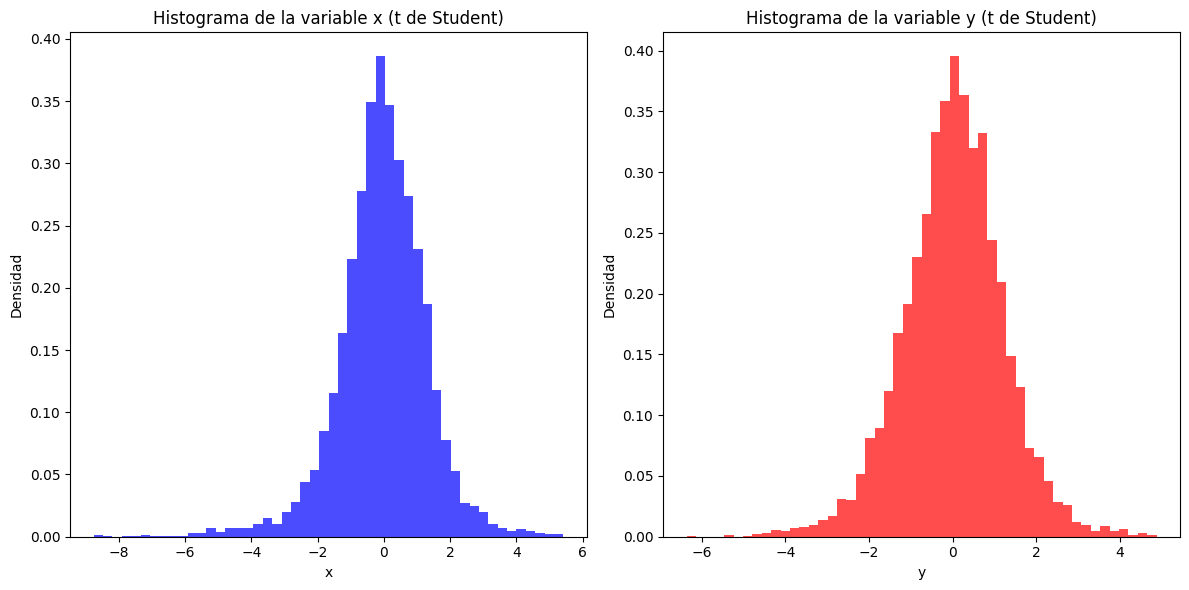

Media de la muestra: [-0.03585827  0.01256764]
Varianza de la muestra: [1.82493595 1.4603233 ]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Definimos la distribución objetivo: una distribución t de Student con v grados de libertad
def target_distribution(x, y, v):
    return t.pdf(x, v) * t.pdf(y, v)

# Algoritmo Metropolis-Hastings para dos variables (x, y)
def metropolis_hastings_2d_t_distribution(target_dist, v, proposal_std, num_samples, initial_value):
    samples = []
    current_sample = np.array(initial_value)

    for _ in range(num_samples):
        # Proponer un nuevo valor para (x, y) de una distribución normal con la media en el valor actual
        proposal = np.random.normal(current_sample, proposal_std, size=2)

        # Calcular la probabilidad de aceptación
        acceptance_ratio = min(1, target_dist(proposal[0], proposal[1], v) /
                                  target_dist(current_sample[0], current_sample[1], v))

        # Aceptar o rechazar la nueva muestra
        if np.random.rand() < acceptance_ratio:
            current_sample = proposal

        # Almacenar la muestra
        samples.append(current_sample)

    return np.array(samples)

# Parámetros del algoritmo
num_samples = 10000
proposal_std = 1.0
initial_value = [0, 0]  # Valores iniciales para x e y
degrees_of_freedom = 5  # Grados de libertad de la distribución t de Student

# Generar las muestras
samples = metropolis_hastings_2d_t_distribution(target_distribution, degrees_of_freedom, proposal_std, num_samples, initial_value)

# Calcular media y varianza de las muestras
mean_sample = np.mean(samples, axis=0)
var_sample = np.var(samples, axis=0)

# Graficar histogramas de las muestras
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(samples[:, 0], bins=50, density=True, alpha=0.7, color='b')
plt.title('Histograma de la variable x (t de Student)')
plt.xlabel('x')
plt.ylabel('Densidad')

plt.subplot(1, 2, 2)
plt.hist(samples[:, 1], bins=50, density=True, alpha=0.7, color='r')
plt.title('Histograma de la variable y (t de Student)')
plt.xlabel('y')
plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

# Mostrar resultados de media y varianza
print("Media de la muestra:", mean_sample)
print("Varianza de la muestra:", var_sample)
